In [1]:
import numpy as np

In [3]:
%matplotlib inline
import numpy as np

In [4]:
from scipy import misc
import matplotlib.pyplot as plt

In [6]:
stadium = misc.imread('./stadium.jpg')

type(stadium)

numpy.ndarray

In [10]:
stadium.shape

(2592, 4608, 3)

In [14]:
bird = misc.imread('./bird.png')

type(bird)

numpy.ndarray

In [24]:
X,Y,Z = bird.shape

In [25]:
working_copy = stadium.copy()

In [27]:
x0=0
y0=0

In [28]:
working_copy[x0:x0+X, y0:y0+Y, :] = bird[:,:,0:3]

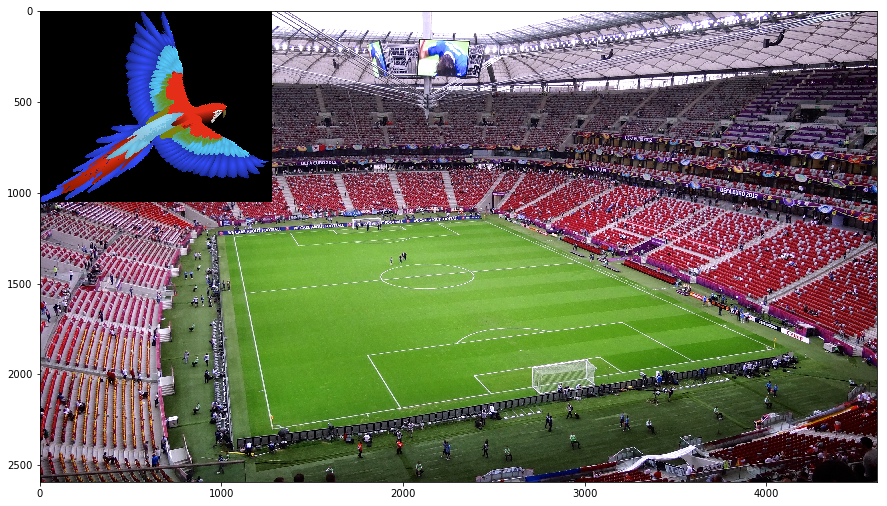

In [31]:
plt.figure(figsize=(15,15))
plt.imshow(working_copy)